ACTIVITY-3:

REGION BASED IMAGE SEGMENTATION

Region Based Segmentation

This program performs region-based segmentation using the Region Growing technique.

1: Original Image

Displays the uploaded input image.

This is the raw image before processing.

2: Region Mask

Generated using region growing algorithm.

White area → Detected region (similar intensity pixels).

Black area → Background.

The region expands from the selected seed point based on pixel similarity.

3: Region Based Segmented Image

The mask is applied to the original image.

Only the detected region remains visible.

Background is removed (appears black).

4: Saved Output

The final result is saved as:

region_based_output.png

Saving Y92.jpg to Y92.jpg


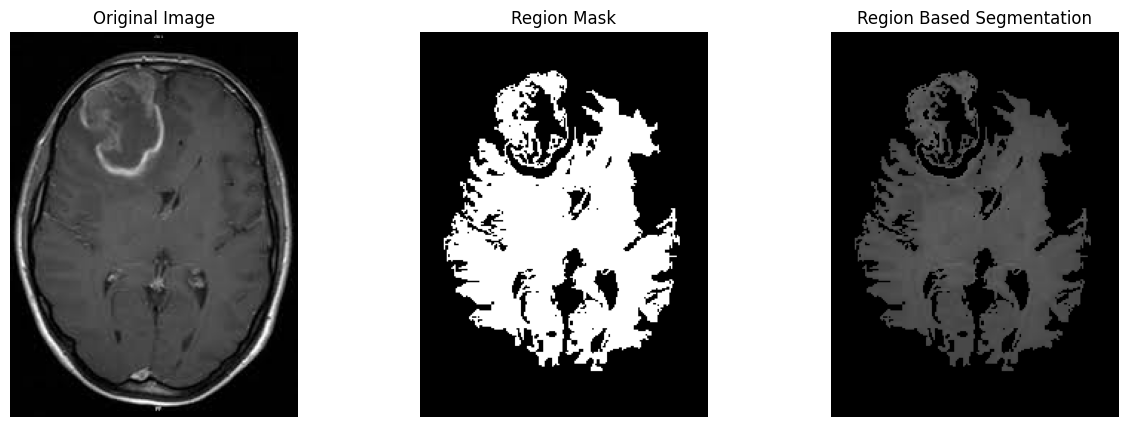

✅ Region-Based Detection Completed!
📁 Output saved as region_based_output.png


In [1]:
!pip install opencv-python pillow
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
pil_img = Image.open(image_path).convert("RGB")
img = np.array(pil_img)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
def region_growing(image, seed, threshold=10):
    h, w = image.shape
    segmented = np.zeros((h, w), np.uint8)
    visited = np.zeros((h, w), bool)
    seed_value = image[seed]
    stack = [seed]
    while stack:
        x, y = stack.pop()
        if visited[x, y]:
            continue
        visited[x, y] = True
        if abs(int(image[x, y]) - int(seed_value)) <= threshold:
            segmented[x, y] = 255
            for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
                nx, ny = x+dx, y+dy
                if 0 <= nx < h and 0 <= ny < w:
                    stack.append((nx, ny))
    return segmented
seed_point = (gray.shape[0]//2, gray.shape[1]//2)
segmented_mask = region_growing(gray, seed_point, threshold=15)
mask_binary = segmented_mask // 255
segmented_img = img * np.stack([mask_binary]*3, axis=-1)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Region Mask")
plt.imshow(segmented_mask, cmap="gray")
plt.axis("off")
plt.subplot(1,3,3)
plt.title("Region Based Segmentation")
plt.imshow(segmented_img)
plt.axis("off")
plt.show()
output = Image.fromarray(segmented_img.astype(np.uint8))
output.save("region_based_output.png")
print("✅ Region-Based Detection Completed!")
print("📁 Output saved as region_based_output.png")
